In [63]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline  

In [64]:
data = pd.read_csv('../SiP_dataset-master/Sip-task-info.csv', encoding='cp1252') 
data.head()

,TaskNumber,Summary,Priority,RaisedByID,AssignedToID,AuthorisedByID,StatusCode,ProjectCode,ProjectBreakdownCode,Category,SubCategory,HoursEstimate,HoursActual,DeveloperID,DeveloperHoursActual,TaskPerformance,DeveloperPerformance
0,1735,Flag RI on SCM Message Summary screen using me...,1,58,58,6.0,FINISHED,PC2,PBC42,Development,Enhancement,14.0,1.75,58,1.75,12.25,12.25
1,1742,Allow RI Policies to be marked as Exhausted,1,58,42,6.0,FINISHED,PC2,PBC21,Development,Enhancement,7.0,7.00,42,7.00,0.00,0.00
2,1971,Fix Invalid UWREF Line DX402L99A1N,2,7,58,6.0,FINISHED,PC2,PBC75,Operational,In House Support,0.7,0.70,58,0.70,0.00,0.00
3,2134,New rows in the diary event for the SCM are re...,5,50,42,6.0,FINISHED,PC2,PBC42,Development,Bug,0.7,0.70,42,0.70,0.00,0.00
4,2251,Application Screen Size - Need to set Min Size...,10,46,13,6.0,FINISHED,PC2,PBC21,Development,Bug,3.5,3.50,13,3.50,0.00,0.00


In [65]:
data.describe()

,TaskNumber,Priority,RaisedByID,AssignedToID,AuthorisedByID,HoursEstimate,HoursActual,DeveloperID,DeveloperHoursActual,TaskPerformance,DeveloperPerformance
count,12299.000000,12299.000000,12299.000000,12299.000000,4265.000000,12299.000000,12299.000000,12299.000000,12299.000000,12299.000000,10200.000000
mean,8932.838686,2.176356,37.103017,37.296772,45.667526,10.152034,13.175468,36.627449,7.724366,-3.023434,0.467541
std,3271.407366,1.720049,19.859530,18.823674,18.773525,28.841783,68.724667,18.958718,36.015641,67.219867,38.666102
min,1735.000000,1.000000,1.000000,1.000000,6.000000,0.010000,0.010000,1.000000,0.010000,-2469.160000,-2079.500000
25%,6188.500000,1.000000,16.000000,22.000000,43.000000,1.000000,1.000000,13.000000,1.000000,-1.750000,0.000000
50%,9090.000000,1.000000,42.000000,42.000000,58.000000,3.000000,3.000000,42.000000,2.000000,0.000000,0.000000
75%,11766.500000,3.000000,58.000000,58.000000,58.000000,7.000000,8.500000,58.000000,5.250000,0.500000,1.000000
max,14377.000000,10.000000,67.000000,65.000000,58.000000,910.000000,2490.160000,65.000000,2100.500000,701.140000,709.840000


In [66]:
# FInd the median
len(np.where((data["HoursActual"]>3) )[0])

5977

In [67]:
# Check the diffrent values in unclear columns
print("StatusCode values: \n{}".format(pd.unique(data["StatusCode"])))
print("ProjectCode values: \n{}".format(pd.unique(data["ProjectCode"])))
print("ProjectBreakdownCode values: \n{}".format(pd.unique(data["ProjectBreakdownCode"])))
print("Category values: \n{}".format(pd.unique(data["Category"])))
print("SubCategory values: \n{}".format(pd.unique(data["SubCategory"])))


StatusCode values: 
['FINISHED' 'CANCELLED' 'RELEASED' 'COMPLETED' 'CHRONICLE' 'ESTIMATED'
 'TEMPLATE' 'AUTHORISE']
ProjectCode values: 
['PC2' 'PC9' 'PC11' 'PC17' 'PC8' 'PC16' 'PC18' 'PC19' 'PC14' 'PC20' 'PC4'
 'PC7' 'PC15' 'PC13' 'PC1' 'PC6' 'PC5' 'PC3' 'PC12' 'PC10']
ProjectBreakdownCode values: 
['PBC42' 'PBC21' 'PBC75' 'PBC11' 'PBC10' 'PBC65' 'PBC53' 'PBC73' 'PBC40'
 'PBC18' 'PBC38' 'PBC15' 'PBC33' 'PBC56' 'PBC35' 'PBC24' 'PBC3' 'PBC6'
 'PBC7' 'PBC5' 'PBC20' 'PBC43' 'PBC31' 'PBC46' 'PBC64' 'PBC12' 'PBC77'
 'PBC62' 'PBC32' 'PBC63' 'PBC26' 'PBC72' 'PBC34' 'PBC13' 'PBC61' 'PBC16'
 'PBC44' 'PBC23' 'PBC41' 'PBC17' 'PBC49' 'PBC30' 'PBC54' 'PBC52' 'PBC59'
 'PBC22' 'PBC25' 'PBC58' 'PBC60' 'PBC36' 'PBC8' 'PBC50' 'PBC28' 'PBC69'
 'PBC37' 'PBC55' 'PBC45' 'PBC47' 'PBC48' 'PBC76' 'PBC9' 'PBC4' 'PBC67'
 'PBC2' 'PBC66' 'PBC71' 'PBC29' 'PBC14' 'PBC51' 'PBC70' 'PBC19' 'PBC74'
 'PBC57' 'PBC1' 'PBC39' 'PBC68' 'PBC27']
Category values: 
['Development' 'Operational' 'Management']
SubCategory values: 


In [68]:
relevent_attributes = ["Priority","RaisedByID","AssignedToID","AuthorisedByID",\
                     "StatusCode","ProjectCode","Category","SubCategory","HoursEstimate",\
                     "HoursActual"]
cat_attributes      = ["StatusCode","ProjectCode","Category","SubCategory"]

relevent_data = data[relevent_attributes]
relevent_data.dtypes

Priority            int64
RaisedByID          int64
AssignedToID        int64
AuthorisedByID    float64
StatusCode         object
ProjectCode        object
Category           object
SubCategory        object
HoursEstimate     float64
HoursActual       float64
dtype: object

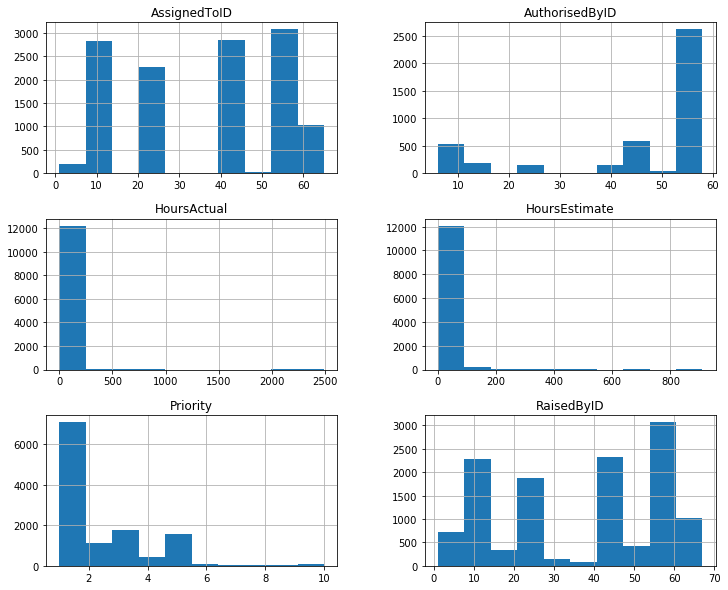

In [69]:
relevent_data.hist(figsize = (12,10))
plt.show()

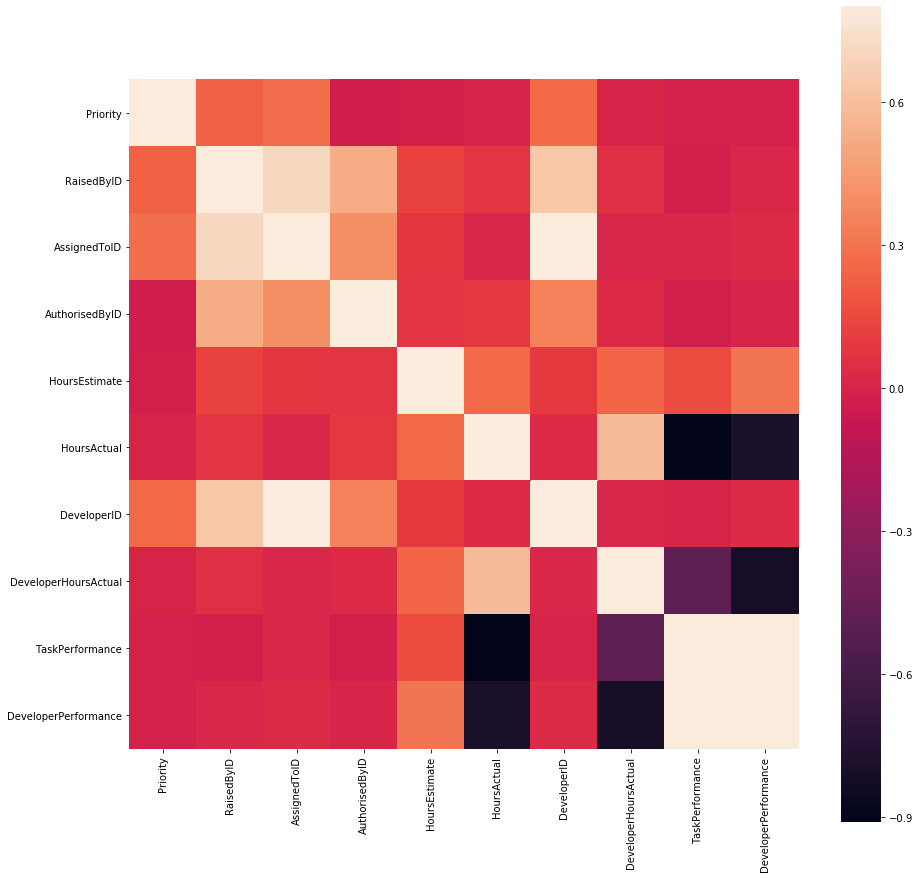

In [70]:
import seaborn as sb
C_mat = relevent_data.loc[:, relevent_data.columns != 'HoursActual'].corr()
C_mat = data.loc[:, ~data.columns.isin(['TaskNumber','Summary'])].corr()

fig = plt.figure(figsize = (15,15))


sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

# Change attribute to continuos attributes

In [71]:
obj_df=relevent_data.copy()
obj_df["StatusCode"] = obj_df["StatusCode"].astype('category')
obj_df["ProjectCode"] = obj_df["ProjectCode"].astype('category')
obj_df["Category"] = obj_df["Category"].astype('category')
obj_df["SubCategory"] = obj_df["SubCategory"].astype('category')
obj_df.dtypes

Priority             int64
RaisedByID           int64
AssignedToID         int64
AuthorisedByID     float64
StatusCode        category
ProjectCode       category
Category          category
SubCategory       category
HoursEstimate      float64
HoursActual        float64
dtype: object

In [72]:
obj_df["StatusCode"]  = obj_df["StatusCode"].cat.codes
obj_df["ProjectCode"] = obj_df["ProjectCode"].cat.codes
obj_df["Category"]    = obj_df["Category"].cat.codes
obj_df["SubCategory"] = obj_df["SubCategory"].cat.codes
obj_df.head()

,Priority,RaisedByID,AssignedToID,AuthorisedByID,StatusCode,ProjectCode,Category,SubCategory,HoursEstimate,HoursActual
0,1,58,58,6.0,5,11,0,7,14.0,1.75
1,1,58,42,6.0,5,11,0,7,7.0,7.00
2,2,7,58,6.0,5,11,2,9,0.7,0.70
3,5,50,42,6.0,5,11,0,1,0.7,0.70
4,10,46,13,6.0,5,11,0,1,3.5,3.50


In [73]:
relevent_data.head()

,Priority,RaisedByID,AssignedToID,AuthorisedByID,StatusCode,ProjectCode,Category,SubCategory,HoursEstimate,HoursActual
0,1,58,58,6.0,FINISHED,PC2,Development,Enhancement,14.0,1.75
1,1,58,42,6.0,FINISHED,PC2,Development,Enhancement,7.0,7.00
2,2,7,58,6.0,FINISHED,PC2,Operational,In House Support,0.7,0.70
3,5,50,42,6.0,FINISHED,PC2,Development,Bug,0.7,0.70
4,10,46,13,6.0,FINISHED,PC2,Development,Bug,3.5,3.50


# Scale Gaussian(mean,std) 

In [25]:
from sklearn import preprocessing

########### UNcommant to do max min scale (and comment all the # std mean scale)
# x = obj_df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# obj_df = pd.DataFrame(x_scaled,columns=obj_df.columns)
# obj_df.head()

# std mean scale
x = obj_df.values
scaler = preprocessing.StandardScaler()
print(scaler.fit(x))
print(scaler.mean_)
print(np.sqrt(scaler.var_))

x_scaled = scaler.fit_transform(x)


obj_df = pd.DataFrame(x_scaled,columns=obj_df.columns)
obj_df.head()

StandardScaler(copy=True, with_mean=True, with_std=True)
[ 2.1763558  37.10301651 37.2967721  45.66752638  3.66420034 11.58956013
  0.49215383  9.01089519 10.15203431 13.17546792]
[ 1.71997926 19.85872225 18.8229083  18.77132427  1.28363037  4.12751166
  0.75560581  6.37758533 28.84060996 68.72187295]


,Priority,RaisedByID,AssignedToID,AuthorisedByID,StatusCode,ProjectCode,Category,SubCategory,HoursEstimate,HoursActual
0,-0.683936,1.052282,1.099895,-2.113198,1.040642,-0.142837,-0.651337,-0.315307,0.133422,-0.166257
1,-0.683936,1.052282,0.249867,-2.113198,1.040642,-0.142837,-0.651337,-0.315307,-0.109292,-0.089862
2,-0.102534,-1.515859,1.099895,-2.113198,1.040642,-0.142837,1.995546,-0.001708,-0.327734,-0.181536
3,1.641673,0.649437,0.249867,-2.113198,1.040642,-0.142837,-0.651337,-1.256102,-0.327734,-0.181536
4,4.548685,0.448014,-1.290809,-2.113198,1.040642,-0.142837,-0.651337,-1.256102,-0.230648,-0.140792


In [26]:
obj_df.to_csv('../SiP_dataset-master/SIP_CAT_GAUS.csv')

# Scale 0-1

In [27]:
from sklearn import preprocessing

# max min scale 
x = obj_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
obj_df = pd.DataFrame(x_scaled,columns=obj_df.columns)
obj_df.head()


,Priority,RaisedByID,AssignedToID,AuthorisedByID,StatusCode,ProjectCode,Category,SubCategory,HoursEstimate,HoursActual
0,0.000000,0.863636,0.890625,0.0,0.714286,0.578947,0.0,0.304348,0.015374,0.000699
1,0.000000,0.863636,0.640625,0.0,0.714286,0.578947,0.0,0.304348,0.007681,0.002807
2,0.111111,0.090909,0.890625,0.0,0.714286,0.578947,1.0,0.391304,0.000758,0.000277
3,0.444444,0.742424,0.640625,0.0,0.714286,0.578947,0.0,0.043478,0.000758,0.000277
4,1.000000,0.681818,0.187500,0.0,0.714286,0.578947,0.0,0.043478,0.003835,0.001402


In [28]:
obj_df.to_csv('../SiP_dataset-master/SIP_CAT_MAXMIN.csv')

# Change attribute categorical to OneHot

In [74]:
obj_df=relevent_data.copy()
obj_df.head()

,Priority,RaisedByID,AssignedToID,AuthorisedByID,StatusCode,ProjectCode,Category,SubCategory,HoursEstimate,HoursActual
0,1,58,58,6.0,FINISHED,PC2,Development,Enhancement,14.0,1.75
1,1,58,42,6.0,FINISHED,PC2,Development,Enhancement,7.0,7.00
2,2,7,58,6.0,FINISHED,PC2,Operational,In House Support,0.7,0.70
3,5,50,42,6.0,FINISHED,PC2,Development,Bug,0.7,0.70
4,10,46,13,6.0,FINISHED,PC2,Development,Bug,3.5,3.50


In [75]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(obj_df.shape[1]))
obj_df = oneHotEncode(obj_df, cat_attributes)
print('There are {} columns after encoding categorical features'.format(obj_df.shape[1]))

There were 10 columns before encoding categorical features
There are 61 columns after encoding categorical features


In [11]:
obj_df.to_csv('../SiP_dataset-master/SIP_OneHot.csv')

In [78]:
obj_df.filter(like='StatusCode').head()

,StatusCode_AUTHORISE,StatusCode_CANCELLED,StatusCode_CHRONICLE,StatusCode_COMPLETED,StatusCode_ESTIMATED,StatusCode_FINISHED,StatusCode_RELEASED,StatusCode_TEMPLATE
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
